## One Dimensional Optimization Problems

The aim of this chapter is to introduce methods for solving one-dimensional optimization tasks, formulated in the following way:
\begin{equation}
    f(x^*)=\underset{x}{\min\ }f(x), x \in \mathbb{R} \label{eq:1}\tag{1}
\end{equation}
where, $f$ is a nonlinear function. The understanding of these optimization tasks and algorithms will be generalized in solving unconstrained optimization tasks involving objective function of multiple variables, in the future chapters.



## What is a Unimodal Function?

A function $f(x)$, where $x \in \mathbb{R}$ is said to be *unimodal* [refer to https://math.mit.edu/~rmd/465/unimod-dip-bds.pdf] if for a value $x^*$ on the real line, the following conditions are satisfied:
* $f$ is monotonically decreasing for  $x \leq v$,
* $f$ is monotonically increasing for $x \geq v$, and
* if the above two conditions are satisfied, then $f(x^*)$ is the minimum value of $f(x)$, and $x^*$ is the minimizer of $f$.


Let us have a look into the figure below.


Text(0.5, 1.0, 'A unimodal quadratic function, showing the minimizer, and the interval of uncertainty')

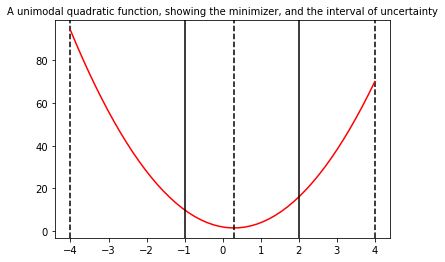

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return 5*x**2 - 3*x + 2
x = np.linspace(-4, 4)
y = f(x)
plt.axvline(x=-4, color='k', linestyle='--')
plt.axvline(x=4, color='k', linestyle='--')
plt.plot(x, y, "-r")
plt.axvline(x=-1, color='k', linestyle='-')
plt.axvline(x=2, color='k', linestyle='-')
plt.axvline(x=0.3, color='k',
linestyle='--')
plt.title("A unimodal quadratic function, showing the minimizer, and the interval of uncertainty", size = 10)

We have taken the quadratic function of one variable: $f(x) = 5x^2-3x+2$. It is a nonlinear unimodal function defined over the interval $[-2,2]$, denoted by the dotted lines on either side.. The minimizer $x^*=0.3$ (which can be solved analytically!), given by the middle dotted line, lies inside the interval $[x_l, x_r]=[-2,2]$. We notice that $f(x)$ strictly decreases for $f(x) < f(x^*)$ and strictly increases for $f(x) > f(x^*)$. The interval $[x_l, x_r]$ that has the minimizer within it, is called the *interval of uncertainty* and the goal of an optimization algorithm is to reduce this interval as much as possible to converge towards the minimizer. A good algorithm completes the convergence very fast. In each step of this reduction of the interval, the algorithm finds a new unimodal interval following the following procedures:

* Choose two new points, $x_1 \in [x_l, x^*]$ and another point $x_2 \in [x^*, x_r]$ (denoted by the two filled straight lines in the figure,
* If $f(x_2) > f(x_1)$, the new interval becomes $[x_l, x_2]$ and $x_r$ becomes $x_2$, i.e, $x_r=x_2$,
* Next pick a new $x_2$,
* If condition in step (2) is not satisfied, we set the new interval as $[x_1, x_r]$ directly after step (1) and set $x_l=x_1$, and
* Next pick a new $x_1$.

The given steps continue iteratively until the convergence is satisfied to a given limit of the minimizer. These class of methods is called an *Elimination Method* and we study two categories under this kind:

* **Fibonacci Search**, and
* **Golden Section Search**.

Rao's book *Engineering Optimization* [Rao, Singiresu S. Engineering optimization: theory and practice. John Wiley & Sons, 2019.] also has some detailed studies on these kinds of optimization methods.



## Fibonacci Search Method

Instead of finding the exact minimizer $x^*$ of $f(x)$, the *Fibonacci search strategy* works by reducing the interval of uncertainty in every step, ultimately converging the interval, containing the minimizer, to a desired size as small as possible. One caveat is that, the initial interval containing, such that the interval lies in it, has to be known beforehand. However, the algorithm works on a nonlinear function, even if it is discontinuous. The name comes from the fact that the algorithm makes use of the famous sequence of *Fibonacci numbers* [http://oeis.org/A000045]. This sequence is defined in the following way:

\begin{align}
F_0&=0,F_1=1, \\ 
F_n&=F_{n-1} + F_{n-2},\text{ where }n=2,3,\ldots
\end{align}

See Rao’s book Engineering Optimization [Rao, Singiresu S. Engineering optimization: theory and practice. John Wiley & Sons, 2019.]

We write a Python code to generate the first 16 Fibonacci numbers and display them as a table:


In [3]:
import pandas as pd
import numpy as np
def fibonacci(n): # define the  function
    fn = [0, 1,]
    for i in range(2, n+1):
        fn.append(fn[i-1] + fn[i-2])
    return fn
N = np.arange(16)
data = {'n': N, 'Fibonacci(n)': fibonacci(15)}
df = pd.DataFrame(data)

df

,n,Fibonacci(n)
0,0,0
1,1,1
2,2,1
3,3,2
4,4,3
5,5,5
6,6,8
7,7,13
8,8,21
9,9,34


Let $n$ be the total number of experiments to be conducted and $[x_l, x_r]$ be the initial interval the algorithm starts with. Let 
\begin{eqnarray}
L_0 = x_r - x_l \label{eq:2}\tag{2}
\end{eqnarray}
be the initial level of uncertainty and let us define,
\begin{eqnarray}
L_j = \frac{F_{n-2}}{F_n}L_0 \label{eq:3}\tag{3}
\end{eqnarray}
where, $F_{n-2}$ and $F_n$ are the $(n-2)^{th}$ and $n^{th}$ *Fibonacci numbers* respectively. We see from the formulation of the *Fibonacci numbers* that, Eq.\eqref{eq:3} shows the following property:
\begin{equation}
    L_j = \frac{F_{n-2}}{F_n}L_0 \leq \frac{L_0}{2} \text{ for } n\geq 2 
\end{equation}
Now, the initial two experiments are set at points $x_1$ and $x_2$, where, $L_j = x_1 - x_l$ and $L_j = x_r - x_2$. So, combining these with Eq.\eqref{eq:3}, we have:
\begin{equation}
    x_1 = x_l + \frac{F_{n-2}}{F_n}L_0 \label{eq:4}\tag{4}
\end{equation}
and
\begin{equation}
    x_2 = x_r - \frac{F_{n-2}}{F_n}L_0 \label{eq:5}\tag{5}
    \end{equation}
Now taking into consideration the unimodality assumption, a part of the interval of uncertainty is rejected, shrinking it to a smaller size, given by,
\begin{equation}
    L_i = L_0 - L_j = L_0(1-\frac{F_{n-2}}{F_n}) = \frac{F_{n-1}}{F_n}L_0 \label{eq:6}\tag{6}
\end{equation}
where, we have used the fact that, $F_n - F_{n-2} = F_{n-1}$ from the formulation of the *Fibonacci numbers*. This procedure leaves us with only one experiment, which, from one end, is situated at a distance of
\begin{equation}
  L_j = \frac{F_{n-2}}{F_n}L_0 = \frac{F_{n-2}}{F_{n-1}}L_i \label{eq:7}\tag{7}
\end{equation}
where, we have used Eq.\eqref{eq:3}. From the other end, the same experiment point is situated at a distance give by,
\begin{equation}
L_i-L_j = \frac{F_{n-3}}{F_n}L_0 = \frac{F_{n-3}}{F_n}L_0 = \frac{F_{n-3}}{F_{n-1}}L_2 \label{eq:8}\tag{8}
\end{equation}
where, we have again used Eq.\eqref{eq:3}. We now place a new experiment point in the interval $L_i$ so that both the present experiment points are situated at a distance given by Eq.\eqref{eq:7}. We again reduce the size of the interval of uncertainty using the unimodality conditions. This whole process is continued so that for the $k^{th}$ experiment point, its location is given by,
\begin{equation}
    L_{k[j]} = \frac{F_{n-k}}{F_{n-(k-2)}}L_{k-1} \label{eq:9}\tag{9}
\end{equation}
and the interval of uncertainty is given by,
\begin{equation}
    l_{k[i]} = \frac{F_{n-(k-1)}}{F_n}L_0 \label{eq:10}\tag{10}
\end{equation}
    after $k$ iterations are completed. Now, the *reduction ratio* given by the ratio of the present interval of uncertainty after conduction of $k$ iterations out of the $n$ experiments to be performed, $L_{k[i]}$ to the initial interval of uncertainty, $L_0$:
\begin{equation}
    R = \frac{L_{k[i]}}{L_0} = \frac{F_{n-(k-1)}}{F_n} \label{eq:11}\tag{11}
\end{equation}

The purpose of this algorithm is to bring $R \sim 0$. We will write a Python function that implements the above algorithm

In [4]:
def fib_search(f, xl, xr, n):
    F = fibonacci(n) # Call the fibonnaci number function
    L0 = xr - xl # Initial interval of uncertainty
    R1 = L0 # Initial Reduction Ratio
    Li = (F[n-2]/F[n])*L0 
    
    R = [Li/L0]
    for i in range(2, n+1):
        if Li > L0/2:
            x1 = xr - Li
            x2 = xl + Li
        else:
            x1 = xl + Li
            x2 = xr - Li
            
        f1, f2 = f(x1), f(x2)
        
        if f1 < f2:
            xr = x2
            Li = (F[n - i]/F[n - (i - 2)])*L0 # New interval of uncertainty
        elif f1 > f2:
            xl = x1
            Li = (F[n - i]/F[n - (i - 2)])*L0 # New interval of uncertainty
        else:
            xl, xr = x1, x2
            Li = (F[n - i]/F[n - (i - 2)])*(xr - xl) # New interval of uncertainty
            
        L0 = xr - xl
        R += [Li/R1,] # Append the new reduction ratio
        
    if f1 <= f2:
        return [x1, f(x1), R] # Final result
    else:
        return [x2, f(x2), R] # Final result

### An Example

Let an objective function be:
\begin{equation}
    f(x) = x^5 - 5x^3 - 20x + 5 \label{eq:12}\tag{12}
\end{equation}
We will use the **Fibonacci search algorithm** to find the minimizer $x^*$, taking $n=25$ and the initial interval of uncertainty $[-2.5, 2.5]$. Let's write a Python function to define the given objective function and visualize the same:

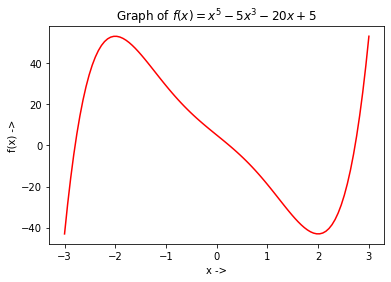

In [5]:
def f(x): # Objective function
    return x**5 - 5*x**3 - 20*x + 5
x = np.linspace(-3, 3, 100)
plt.plot(x, f(x), 'r-')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Graph of $f(x) =  x^5-5x^3-20x+5$")
plt.show()

Now, we consider $n=25$ and use the function `fib_search(f, -2.5, 2.5, 25)` to run the optimization and print the results:

In [6]:
Fib = fib_search(f, -2.5, 2.5, 25)
x_star, f_x_star, R = Fib
print ("x*:", x_star)
print ("f(x*):", f_x_star)
print ("Final Reduction Ratio:", R[-1])

x*: 1.999966677774075
f(x*): -42.99999994448275
Final Reduction Ratio: 0.0


We see that $x^* \sim 2$, $f(x^*) \sim -43$ and the final *Reduction Ration* is 0. Now, to show the positions of $x^*$ and $f(x^*)$ on the graph of the objective function, we write the following code:

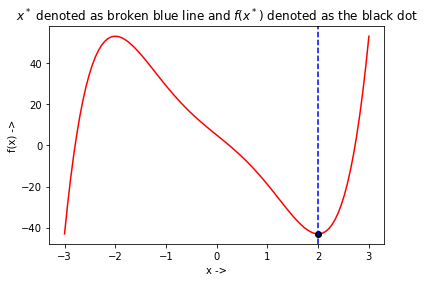

In [7]:
x = np.linspace(-3, 3, 100)
plt.plot(x, f(x), 'r-')
plt.plot([x_star], [f_x_star], 'ko')
plt.axvline(x=x_star, color='b', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("$x^*$ denoted as broken blue line and $f(x^*)$ denoted as the black dot")
plt.show()

We can modify our function in such a way that all the optimization data in every step are collected
and displayed as a `DataFrame`:

In [8]:
def fib_search(f, xl, xr, n):    
    F = fibonacci(n)
    L0 = xr - xl
    ini = L0
    Li = (F[n-2]/F[n])*L0
    
    R = [Li/L0]
    a = [xl]
    b = [xr]
    F1 = [f(xl)]
    F2 = [f(xr)]
    for i in range(2, n+1):
        #print("reduction ratio:", Li/ini)
        if Li > L0/2:
            x1 = xr - Li
            x2 = xl + Li
        else:
            x1 = xl + Li
            x2 = xr - Li
            
        f1, f2 = f(x1), f(x2)
        
        if f1 < f2:
            xr = x2
            Li = (F[n - i]/F[n - (i - 2)])*L0
        elif f1 > f2:
            xl = x1
            Li = (F[n - i]/F[n - (i - 2)])*L0
        else:
            xl, xr = x1, x2
            Li = (F[n - i]/F[n - (i - 2)])*(xr - xl)
            
        L0 = xr - xl
        R += [Li/ini,] 
        a += [xl, ]
        b += [xr, ]
        F1 += [f1, ]
        F2 += [f2, ]
        
    data = {'n' : range(0, n),
            'xl': a,
            'xr': b,
            'f(x1)': F1,
            'f(x2)': F2,
            'Reduction Ratio': R}
    df = pd.DataFrame(data, columns = ['n', 'xl', 'xr', 'f(x1)', 'f(x2)', 'Reduction Ratio'])
    return df
df = fib_search(f, -2.5, 2.5, 25)
df

,n,xl,xr,f(x1),f(x2),Reduction Ratio
0,0,-2.500000,2.500000,35.468750,-25.468750,0.381966
1,1,-0.590170,2.500000,17.759586,-7.759586,0.381966
2,2,0.590170,2.500000,-7.759586,-28.881854,0.236068
3,3,1.319660,2.500000,-28.881854,-40.762632,0.145898
4,4,1.770510,2.500000,-40.762632,-42.874998,0.090170
5,5,1.770510,2.221360,-42.874998,-40.145824,0.055728
6,6,1.942719,2.221360,-42.842416,-42.874998,0.034442
7,7,1.942719,2.114928,-42.874998,-42.284678,0.021286
8,8,1.942719,2.049150,-42.996368,-42.874998,0.013156
9,9,1.983372,2.049150,-42.986336,-42.996368,0.008131


The graph of the reduction ratio at each $n$ can be plotted with the following code:

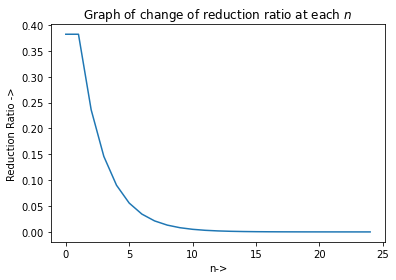

In [9]:
plt.xlabel("n->")
plt.ylabel("Reduction Ratio ->")
plt.plot(range(0, len(df)), df['Reduction Ratio'])
plt.title("Graph of change of reduction ratio at each $n$")
plt.show()

In the next section we discuss the following direct root finding methods:

* **Newton's method**,
* **Secant Method**, and
* **Bisection Method**

## Newton's Method

For a given objective function $f(x), x\in \mathbb{R}$, the necessary condition for it to contain a minimizer $x^*$, is that $\frac{df}{dx}(x^*)=0$. The aim of these direct root-finding methods is thus to obtain the solution of the equation,
\begin{equation}
    \frac{df}{dx}(x)=0 \label{eq:13}\tag{13}
\end{equation}

At point $x_j$, the Taylor's expansion of the objective function, up to the second order terms is given by,
\begin{equation}
    f(x) = f(x_j) + (x - x_j)\frac{df}{dx}(x_j) + \frac{1}{2}(x - x_j)^2\frac{d^2f}{dx^2}(x_j) \label{eq:14}\tag{14}
\end{equation}

Now, 
\begin{equation}
    \frac{df}{dx}(x_j) = 0 \label{eq:15}\tag{15}
\end{equation}
so, 

Eq.\eqref{eq:14} reduces to 
\begin{equation}
    f(x) = f(x_j) + \frac{1}{2}(x - x_j)^2\frac{d^2f}{dx^2}(x_j) \label{eq:16}\tag{16}
\end{equation}

Here $\frac{d^2f}{dx^2}(x_j)$ is a constant. Now, we find the derivative of Eq.\eqref{eq:16} and set it to $0$ following Eq.\eqref{eq:13}
\begin{align}
\frac{df}{dx}(x) &= 0 \\
\frac{df}{dx}(x_j) + (x - x_j)\frac{d^2f}{dx^2}(x_j) &= 0 \label{eq:17}\tag{17}
\end{align}

We get,
\begin{equation}
    x = x_j - \frac{\frac{df}{dx}(x_j)}{\frac{d^2f}{dx^2}(x_j)} \label{eq:18}\tag{18}
\end{equation}

$x_j$ denotes an approximation to the minimizer $x^*$ of $f(x)$. An improved approximation in the form of an iterative process can be given using Eq.\eqref{eq:18},
\begin{equation}
    x_{j+1} = x_j - \frac{\frac{df}{dx}(x_j)}{\frac{d^2f}{dx^2}(x_j)} \label{eq:19}\tag{19}
\end{equation}

The termination condition for convergence after a sufficient number of large iterations to $x^*$ is given by:
\begin{equation}
    |\frac{df}{dx}(x_{j+1})| \leq \epsilon \label{eq:20}\tag{20}
\end{equation}

where, $\epsilon$ is the tolerance set by the user for the optimization algorithm. In numerical analysis literature, the *Newton's method* is also sometimes called the *Newton-Raphson method*, because it was originally designed by Newton and was later improved by Raphson. The *Newton's method* has a fast convergence property called the *quadratic convergence*.


For a twice differentiable objective function $f(x)$, assuming that its minimizer $x^*$ lies in the interval $(x_l, x_r)$, with $\frac{df}{dx}(x^*) \neq 0$ and $f(x^*) = 0$, for the Newton's iteration, if $x_j$ converges to $x^*$ for a large number of iterations, $j \to \infty$, $x_j$ is said to be *quadratically convergent* to $x^*$ if the following condition is satisfied:
\begin{equation}
    |x_{j+1} - x^*| \leq M|x_j - x^*|^2, \text{ if } M > \frac{|\frac{d^2f}{dx^2}(x^*)|}{2|\frac{df}{dx}(x^*)|} \label{eq:21}\tag{21}
\end{equation}


### An Example

Let us consider the objective function,
\begin{equation}
    f(x) = x^3 + x^2 - 1 \label{eq:22}\tag{22}
\end{equation}

We will use the *Newton's method* to find the root $x^*$ of the objective function, along with the function value $f(x^*)$ at this point. Let the initial experimental point of the iteration be $x_j = 2.0$ and the tolerance be $\epsilon = 10^{-6}$. In the algorithm aboave we see that we have to define two functions besides the objective function. They are `fprime()` for $\frac{df}{dx}$, i.e, the first derivative and `fprime2()` for $\frac{d^2f}{dx^2}$, i.e, the second derivative. We will use the `autograd` package we discussed before, to define the derivative functions. Let us start with defining the objective function first:


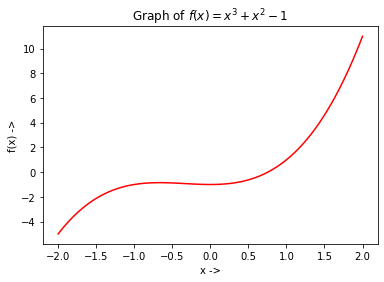

In [11]:
def f(x): # objective function
    return x**3 + x**2 -1
l = np.linspace(-2, 2, 100)
plt.plot(l, f(l), 'r-')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Graph of $f(x) =  x^3 + x^2 - 1$")
plt.show()

We now define the functions for the first derivative and the second derivative of $f(x)$:

In [13]:
import autograd.numpy as au
from autograd import grad, jacobian

fprime = grad(f) # first derivative of f(x)
fprime2 = grad(fprime) # second derivative of f(x)

To find the value of these derivatives at a given point, we write our code in the following way:

In [14]:
print(fprime(0.)) # first derivative of f(x) at point x=0
print(fprime2(0.75)) # second derivative of f(x) at point 0.75

0.0
6.5


Now, to implement *Newton's method*, we will first introduce the `root_scalar()` function of the `scipy.optimize` package, which is used for direct root finding for scalar nonlinear objective functions. Detailed descriptions of the parameters in `root_scalar()` function can be found in the `scipy.optimize` official documentation. The `root_scalar()` function returns the solution as `RootResults` object.

Now, returning back to the original problem, where we intend to find the root of the objective function, using the *Newton's method*, and using the given value of the initial experimental point and the tolerance, we write the following Python code:


In [15]:
from scipy import optimize
def FP(x): # Returns the objective function, its first and second derivative at the point x
    return f(x), fprime(x), fprime2(x)
sol = optimize.root_scalar(FP, x0=2., fprime=True, fprime2=True, xtol=10**-6, method='newton') # The solver code, using the method = 'newton'
print(sol) # Prints the results

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 6
           root: 0.7548776662468297


We see the root is approximately $0.75$, the convergence was successful and there have been $6$ iterations in the optimization process and the function has been evaluated $6$ times too. The optimization data has been collected and is shown below:


In [17]:
L = []
def F(x): # objective function
    L.append(x)
    return x**3 + x**2 -1
def FP(x): # Returns the objective function, its first and second derivative at the point x
    return F(x), fprime(x), fprime2(x)
sol = optimize.root_scalar(FP, x0=2., fprime=True, fprime2=True, xtol=10**-6, method='newton')
fL = []
for i in L:
    fL += [f(i), ]
data = {'x' : L,
        'f(x)': fL}
        
df = pd.DataFrame(data, columns = ['x', 'f(x)'])
df

,x,f(x)
0,2.000000,11.000000
1,1.312500,2.983643
2,0.929637,0.667639
3,0.779671,0.081839
4,0.755480,0.001940
5,0.754878,0.000001


The optimization steps can be plotted too. The graph with all the function evaluations along with the minimizer $f(x^*)$ at $x^*$ has been denoted as a blue dotted line in the below figure which can be generated using the following Python code:


Text(0.5, 1.0, 'optimization of $f(x) = x^3 + x^2 - 1$')

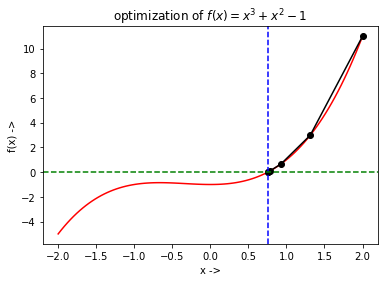

In [18]:
plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), 'r-')
plt.plot(df['x'], df['f(x)'], 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("optimization of $f(x) = x^3 + x^2 - 1$")

## Secant Method

The formulation of the *secant method* looks similar to that of the **Newton's method**.

\begin{equation}
\frac{df}{dx}(x_j) + s\frac{d^2f}{dx^2}(x_j) = 0 \label{eq:23}\tag{23}
\end{equation}

Where, $s$ is the slope of the line connecting the points $(a, \frac{df}{dx}(a))$ and $(b, \frac{df}{dx}(b))$ on the $x-\frac{df}{dx}$ plane. $a$ and $b$ are two different approximations to the root of the objective function. We know the equation for the slope,
\begin{align}
s = \frac{\frac{df}{dx}(b) - \frac{df}{dx}(a)}{b - a} \label{eq:24}\tag{24}
\end{align}

So, Eq.\eqref{eq:23} can be written as:
\begin{eqnarray}
    x &-& x_j = -\frac{\frac{df}{dx}(x_j)}{s} \nonumber \\
    x &=& x_j - \frac{\frac{df}{dx}(a)(b - a)}{\frac{df}{dx}(b) - \frac{df}{dx}(a)} = a - \frac{\frac{df}{dx}(a)(a - b)}{\frac{df}{dx}(a) - \frac{df}{dx}(b)}  \label{eq:25}\tag{25}
\end{eqnarray}

The iterative process, known as the *secant method* is thus given by,
\begin{equation}
    x_{j+1} = x_j - \frac{\frac{df}{dx}(x_j)(x_j - x_{j-1})}{\frac{df}{dx}(x_j) - \frac{df}{dx}(x_{j+1})} \label{eq:26}\tag{26}
\end{equation}

The *secant* of a curve is a line that intersects the curve at minimum of two distinct points. As $b \to a$, the secant approaches $\frac{d^2f}{dx^2}(a)$. Due to this reason, the *secant method* is also called the *quasi-Newton method*. The root $x^*$ lies between the points $a$ and $b$ if the following condition is satisfied:

\begin{equation}
    \frac{df}{dx}(a)\frac{df}{dx}(b) < 0 \label{eq:27}\tag{27}
\end{equation}

As we have seen, the iteration process demands two initial points to start with, i.e, $a$ and $b$. The iterates $x_j$ converges to the root of the objective function when $a$ and $b$ are close to the root. The order of convergence for the process is given by the number $\phi=\frac{\sqrt{5}+1}{2} \approx 1.618$, which is the golden ratio, i.e, the *secant method* has a *superlinear convergence*, unlike a quadratic or a cubic convergence.


### An Example

Let us consider an objective function given by,
\begin{equation}
    f(x) = x\cos(x^2 - 7x) - 2x \label{eq:28}\tag{28}
\end{equation}
We will find the root of this objective function, given the two starting points are $a=-1.5$ and $b=1$ and the tolerance $\epsilon = 10^{-7}$.

The plot for this objective function can be generated in the following way:


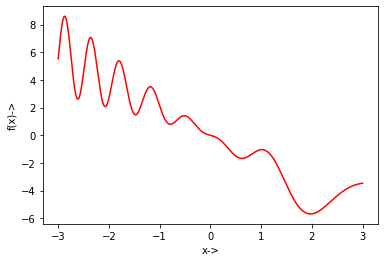

In [19]:
def f(x): return x*au.cos(x**2-7*x)-2*x
l = np.linspace(-3, 3., 1000)
plt.plot(l, f(l), 'r-')
plt.xlabel('x->')
plt.ylabel('f(x)->')
plt.show()

The corresponding $x-\frac{df}{dx}(x)$ plot is given below:

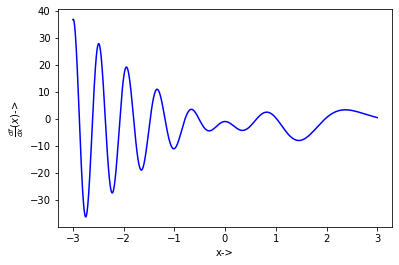

In [20]:
def f(x): return x*au.cos(x**2-7*x)-2*x
l = np.linspace(-3, 3., 1000)
G = grad(f)
h=[]
for i in l:
    h+=[G(i),]
h = np.array(h)
plt.plot(l, h, 'b-')
plt.xlabel('x->')
plt.ylabel('$\\frac{df}{dx}(x)$->')
plt.show()

The objective function and its first derivative can be defined in Python:

In [21]:
def f(x): # Objective function
    return x*au.cos(x**2 - 7*x) - 2*x
    
fprime = grad(f) # First derivative of the objective function

Now, the function that returns both the objective function and its first derivative at a particular point can be defined as:

In [22]:
def FP(x):
    return f(x), fprime(x)

We now write the solver code with the `root_scalar()` function where the parameters are set to be `method='secant'`, `x0=-1.5`, `x1=1.`, `xtol=10**-7` and so on. 


In [23]:
sol = optimize.root_scalar(FP, x0=-1.5, x1=1., fprime=True, xtol=10**-7, method='secant')
print(sol) # Print the solution results

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: -6.677327076928414e-24


The optimization data has been collected and is shown below:

In [24]:
L = []
def F(x): # objective function
    L.append(x)
    return x*au.cos(x**2 - 7*x) - 2*x
def FP(x): # Returns the objective function and its derivatives
    return F(x), fprime(x)
sol = optimize.root_scalar(FP, x0=-1.5, x1=1., fprime=True, xtol=10**-7, method='secant')
fL = []
fL2 = []
for i in L:
    fL += [f(i), ]
    fL2 += [fprime(i), ]
data = {"x" : L,
        "f(x)": fL,
        "f'(x)": fL2}
        
df = pd.DataFrame(data, columns = ['x', 'f(x)', "f'(x)"])

,x,f(x),f'(x)
0,-1.500000e+00,1.525219e+00,-3.755800
1,1.000000e+00,-1.039830e+00,0.357248
2,-1.346007e-02,1.352000e-02,-1.013368
3,-1.650793e-04,1.650794e-04,-1.000002
4,-7.406967e-07,7.406967e-07,-1.000000
5,-4.967710e-13,4.967710e-13,-1.000000


The plot of the optimization steps showing the convergence of the root, along with the root being denoted by the vertical broken blue line and its corresponding function value denoted by horizontal broken green line has been shown below:


Text(0.5, 1.0, 'optimization of $f(x) = x\\cos(x^2 - 7x) - 2x$')

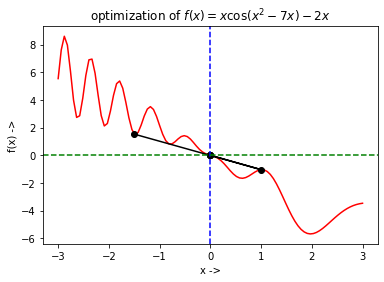

In [26]:
plt.plot(np.linspace(-3, 3, 100), f(np.linspace(-3, 3, 100)), 'r-')
plt.plot(df['x'], df['f(x)'], 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("optimization of $f(x) = x\cos(x^2 - 7x) - 2x$")

A similar kind of plot is shown for the $x-\frac{df}{dx}(x)$ plane:

Text(0.5, 1.0, 'Visualizing the root and the $\\frac{df}{dx}(x)$ value')

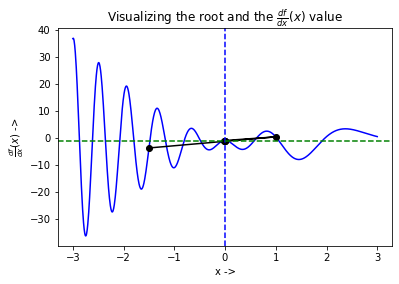

In [27]:
l = np.linspace(-3, 3., 1000)
G = grad(f)
h=[]
for i in l:
    h+=[G(i),]
h = np.array(h)
plt.plot(l, h, 'b-')
plt.plot(df['x'], df["f'(x)"], 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=G(f(sol.root)), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('$\\frac{df}{dx}(x)$ ->')
plt.title("Visualizing the root and the $\\frac{df}{dx}(x)$ value")

## Bisection Method

The bisection method starts with the continuous objective function with an initial interval provided, given by $[x_l, x_r]$ such that the root lies in between them and the following condition is satisfied:

\begin{equation}
    f(x_l)f(x_r) < 0 \label{eq:29}\tag{29}
\end{equation}

The method works by iteratively bisecting the interval and selecting the subinterval where Eq.\eqref{eq:29} is satisfied for the newly chosen points. A new point $x_j \in [x_l, x_r]$ is chosen according to the following:
\begin{equation}
    x_j = \frac{x_l+x_r}{2} \label{eq:30}\tag{30}
\end{equation}

### An Example

Let us consider an objective function, given by,
\begin{equation}
    f(x) = x^3 - 2x - 2 \label{eq:31}\tag{31}
\end{equation}
We will find the root of this objective function using *bisection method*, given the initial interval is $[-1, 2]$ and the tolerance is $\epsilon=10^{-7}$. Let us first define the objective function and its first derivative in Python:


In [28]:
def f(x):
    return x**3 - 2*x - 2
fprime = grad(f)

def FP(x):
    return f(x), fprime(x)
sol = optimize.root_scalar(FP, bracket=[-1., 2.], fprime=True, xtol=10**-7, method='bisect')
print(sol)

      converged: True
           flag: 'converged'
 function_calls: 27
     iterations: 25
           root: 1.7692923843860626


We have set our initial interval as asked, by setting the parameter `bracket=[-1., 2.]`. The root is $\sim 1.77$. The optimization data has been collected and is shown below:

In [29]:
L = []
def F(x): # objective function
    L.append(x)
    return x**3 - 2*x - 2
def FP(x): # Returns the objective function and its derivatives
    return F(x), fprime(x)
sol = optimize.root_scalar(FP, bracket=[-1., 2.], fprime=True, xtol=10**-7, method='bisect')
fL = []
for i in L:
    fL += [f(i), ]
data = {"x" : L,
        "f(x)": fL}
        
df = pd.DataFrame(data, columns = ['x', 'f(x)'])

df

,x,f(x)
0,-1.000000,-1.000000e+00
1,2.000000,2.000000e+00
2,0.500000,-2.875000e+00
3,1.250000,-2.546875e+00
4,1.625000,-9.589844e-01
5,1.812500,3.293457e-01
6,1.718750,-3.601379e-01
7,1.765625,-2.703476e-02
8,1.789062,1.482072e-01
9,1.777344,5.985397e-02


The plot of the optimization steps showing the convergence of the root, along with the root being denoted by the vertical broken blue line and its corresponding function value denoted by horizontal broken green line has been shown below:


Text(0.5, 1.0, 'optimization of $f(x) = x^3 - 2x - 2$')

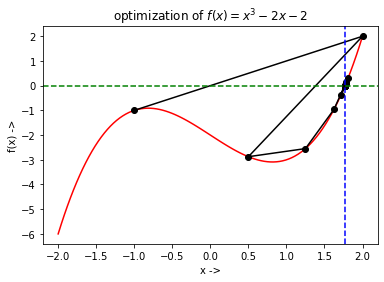

In [30]:
plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), 'r-')
plt.plot(df['x'], df['f(x)'], 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("optimization of $f(x) = x^3 - 2x - 2$")

The audience is encouraged to try out the remaining solvers that will not be discussed further, but are provided by the `root_scalar()` function. This includes `'brenth'`, `'ridder'` and `'toms748'`. These method might come handy for those who want to explore more. In the next chapter, we will be discussing *line search descent methods* for solving unconstrained minimization tasks involving multivariate nonlinear objective functions.